## FA&ML Final Code                     Botao Xu 21104219

In [1]:
import pdfplumber 
from os.path import join, dirname
from os import listdir


## Tutorial Code (From tutorial 2)

In [2]:
# Import packages
import pandas as pd
from datetime import datetime
from datetime import date
import xlrd
import numpy as np
import re
# Some functions built by the user
import myfunction as mf
import nltk
nltk.download('stopwords')

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rodgerxu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
def read_pdf(ticker):
    text_all=''
    with pdfplumber.open(ticker) as pdf:
        for page in pdf.pages:
            text=page.extract_text()
            text_all+=text
    return text_all

In [4]:
FTSE100=['AHT','AZN','BARC','BP','BTA','GSK','HSBA','IAG','LLOY','NWG','RDSA','SHP','SKY','SN','TUI']

AHT=read_pdf('Data/AHT.pdf')

In [5]:
full_text=[0]*len(FTSE100)

In [6]:
for i in FTSE100:
    full_text[FTSE100.index(i)]=read_pdf('Data/'+i+'.pdf')

In [7]:
EC=pd.DataFrame({'full_text':full_text})
EC.index=FTSE100

In [8]:
EC

,full_text
AHT,Company Name: Ashtead Market Cap: 8781.3802740...
AZN,Company Name: AstraZeneca Market Cap: 66384.37...
BARC,Company Name: Barclays Market Cap: 35913.20074...
BP,Company Name: BP Market Cap: 109281.133456 Blo...
BTA,Company Name: BT Market Cap: 30783.0234251 Blo...
GSK,Company Name: Glaxo Market Cap: 70030.4659254 ...
HSBA,"Company Name: HSBC Market Cap: 140,569.05 Bloo..."
IAG,Company Name: International Consolidated Airli...
LLOY,Company Name: Lloyds Market Cap: 46801.5085506...
NWG,Company Name: NatWest Market Cap: 32276.254662...


## NLP

In [9]:
EC_text = EC['full_text']
for i in range(len(EC_text)):
    # convert to lower case
    EC_text[i] = EC_text[i].lower()
    # take out non words
    EC_text[i] = re.sub(r'\W',' ',EC_text[i])
    # drop multiple spaces
    EC_text[i] = re.sub(r'\s+',' ',EC_text[i])
    # drop \n
    EC_text[i] = re.sub(r'\!|\?|\n',' ',EC_text[i])

## Remove stopwords (words that do not add any value) and empty

In [10]:
from nltk.corpus import stopwords
import copy

In [11]:
stop_words = set(stopwords.words('english')).union([""])
filtered_EC = copy.deepcopy(EC_text)
for j in range(len(EC_text)):
    filtered_EC[j] = [w for w in EC_text[j].split(" ") if not w in stop_words]

In [12]:
filtered_EC

AHT     [company, name, ashtead, market, cap, 8781, 38...
AZN     [company, name, astrazeneca, market, cap, 6638...
BARC    [company, name, barclays, market, cap, 35913, ...
BP      [company, name, bp, market, cap, 109281, 13345...
BTA     [company, name, bt, market, cap, 30783, 023425...
GSK     [company, name, glaxo, market, cap, 70030, 465...
HSBA    [company, name, hsbc, market, cap, 140, 569, 0...
IAG     [company, name, international, consolidated, a...
LLOY    [company, name, lloyds, market, cap, 46801, 50...
NWG     [company, name, natwest, market, cap, 32276, 2...
RDSA    [company, name, shell, market, cap, 211264, 88...
SHP     [company, name, shire, market, cap, 34960, 685...
SKY     [company, name, sky, ltd, market, cap, 15926, ...
SN      [company, name, smith, nephew, market, cap, 11...
TUI     [company, name, tui, market, cap, 9, 647, 83, ...
Name: full_text, dtype: object

In [13]:
list_EC = []
total = []
for j in range(len(filtered_EC)):
    this_document = filtered_EC[j]
    list_EC.append(this_document)
    total = set(total).union(set(this_document))

In [14]:
len(list_EC)

15

## Count words in each sentence

In [15]:
# Count words in each sentence
wordDict = []
# Create a dictionary with all words
Doc_count_word = dict.fromkeys(total, 0)
for j in range(len(filtered_EC)):
    this_wordDict = dict.fromkeys(total, 0) 
    #print(this_wordDict)
    for word in filtered_EC[j]:
        #print(word)
        #print(this_wordDict[word])
        # count how many documents contain the word
        if this_wordDict[word] == 0 : Doc_count_word[word] += 1
        #print(word)
        # plus count how many times the word is contained into the document
        this_wordDict[word] += 1
        #print(this_wordDict[word])
    wordDict.append(this_wordDict) 

In [16]:
len(Doc_count_word)

6823

## compute the term frequency (n times words / total words)¶

In [17]:
# compute the term frequency (n times words / total words)
# https://www.freecodecamp.org/news/how-to-process-textual-data-using-tf-idf-in-python-cd2bbc0a94a3/
tfAll = []
for j in range(len(wordDict)):
    tfAll.append(mf.computeTF(wordDict[j], list_EC[j]))

In [18]:
tfAll

[{'inform': 0.0,
  'development': 0.0,
  'contractor': 0.00017406440382941688,
  'placed': 0.0,
  'lymphoma': 0.0,
  'take': 0.0019147084421235858,
  '786': 0.00278503046127067,
  'confirmed': 0.0,
  'bohen': 0.0,
  'download': 0.0,
  'noted': 0.0,
  'reﬂect': 0.0,
  'floor': 0.00017406440382941688,
  'aggression': 0.0,
  'entities': 0.0,
  'reﬂecting': 0.0,
  'veronika': 0.0,
  'consumer': 0.0,
  'spanish': 0.0,
  'destinations': 0.0,
  'secondhand': 0.0,
  'navio': 0.0,
  'remarks': 0.0,
  'exacerbation': 0.0,
  'spreading': 0.0,
  'ancillary': 0.0,
  'everybody': 0.0005221932114882506,
  'postcode': 0.0,
  'eaten': 0.0,
  'likelihood': 0.0,
  'talked': 0.001566579634464752,
  'scenario': 0.0,
  'types': 0.0,
  'breo': 0.0,
  'cook': 0.0,
  'segway': 0.0,
  'arrears': 0.0,
  'quicker': 0.00017406440382941688,
  '192': 0.0,
  'section': 0.0,
  'involves': 0.0,
  'engine': 0.0,
  'sense': 0.00017406440382941688,
  'aer': 0.0,
  'amount': 0.00034812880765883376,
  '19th': 0.0,
  'yeah':

## Compute Inverse Data Frequency (idf)

In [19]:
#log10(number of documents on / number of documents containing the word)
idfs = mf.computeIDF(Doc_count_word, len(wordDict))
# Compute TFidf
TFidf = []
for j in range(len(wordDict)):
    TFidf.append(mf.computeTFIDF(tfAll[j], idfs))
df_TFidf = pd.DataFrame(TFidf)

In [20]:
df_TFidf

,inform,development,contractor,placed,lymphoma,take,786,confirmed,bohen,download,...,loss,placements,inhaled,2s,invest,daniel,compared,found,attrition,massive
0,0.000000,0.000000,0.000205,0.000000,0.000000,0.0,0.003275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000058,0.000000,0.000000,0.000000,0.000000,0.000152
1,0.000236,0.000199,0.000000,0.000000,0.000158,0.0,0.000000,0.000000,0.001425,0.000158,...,0.000223,0.000000,0.000000,0.000000,0.000045,0.000000,0.000039,0.000000,0.000000,0.000000
2,0.000000,0.000029,0.000000,0.000000,0.000000,0.0,0.000000,0.000075,0.000000,0.000000,...,0.000071,0.000000,0.000000,0.000000,0.000107,0.000000,0.000031,0.000000,0.000000,0.000000
3,0.000000,0.000129,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000108,0.000127,0.000000,0.000000
4,0.000111,0.000017,0.000000,0.000618,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000209,0.000000,0.000000,0.000000,0.000334,0.000000,0.000024,0.000050,0.000000,0.000000
5,0.000000,0.000151,0.000000,0.000112,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000377,0.000000,0.000212,0.000281,0.000047,0.000000,0.000000,0.000000
6,0.000000,0.000042,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000154,0.000000,0.000000,0.000183,0.000617,0.000000,0.000105,0.000000,0.000000,0.000136
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000062,0.000000,0.000000,0.000000,0.000000,0.000493,0.000000,0.000075,0.000000,0.000000
8,0.000000,0.000027,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000066,0.000000,0.000000,0.000000,0.000000,0.000000,0.000019,0.000080,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000044,0.000060,0.000356,0.000000


## Import dictionaries (words)

In [21]:
positives_all = list(pd.read_csv("Positive.csv")["both"].dropna())
negatives_all = list(pd.read_csv("Negative.csv")["both"].dropna())
positives_LM = list(pd.read_csv("Positive.csv")["LM"].dropna())
negatives_LM = list(pd.read_csv("Negative.csv")["LM"].dropna())
positives_GI = list(pd.read_csv("Positive.csv")["GI"].dropna())
negatives_GI = list(pd.read_csv("Negative.csv")["GI"].dropna())

## Map words to numbers using the three dictionaries

In [22]:
Doc_word_LM = mf.map_word_to_sent(Doc_count_word, positives_LM, negatives_LM, similarity_check = False)
Doc_word_GI = mf.map_word_to_sent(Doc_count_word, positives_GI, negatives_GI, similarity_check = False)
Doc_word_all = mf.map_word_to_sent(Doc_count_word, positives_all, negatives_all, similarity_check = True)

## Compute scores by weighting the words by the weights obtaining using TFidf

In [23]:
df_scores_GI = copy.deepcopy(df_TFidf)
df_scores_LM = copy.deepcopy(df_TFidf)
df_scores_all = copy.deepcopy(df_TFidf)
for this_key in df_scores_all.keys():
    df_scores_GI[this_key] = df_scores_GI[this_key]*Doc_word_GI[this_key]
    df_scores_LM[this_key] = df_scores_LM[this_key]*Doc_word_LM[this_key]
    df_scores_all[this_key] = df_scores_all[this_key]*Doc_word_all[this_key]

## Put in a unique dataframe

In [102]:
final_df = pd.DataFrame()
final_df["sentiment_index_GI"] = df_scores_GI.sum(axis = 1)
final_df["sentiment_index_LM"] = df_scores_LM.sum(axis = 1)
final_df["sentiment_index_all"] = df_scores_all.sum(axis = 1)
# final_df["Name"] = EC.index
# final_df = final_df.set_index('Name')



In [103]:
final_df

,sentiment_index_GI,sentiment_index_LM,sentiment_index_all
0,0.001665,-0.000328,0.070858
1,-0.002505,0.000708,0.031938
2,0.004616,-0.003555,0.030808
3,0.005440,0.000101,0.016215
4,0.008023,-0.001836,0.065438
5,0.004143,0.002532,0.049586
6,0.003881,-0.001146,0.036199
7,0.002792,-0.003216,0.072598
8,0.003365,-0.003203,0.037383
9,0.004079,-0.003424,0.037571


In [89]:
fund = pd.read_csv("fundamental.csv")
fund.set_index(["Company"], inplace=True)
fund = fund.astype('float')
fund

,2018 Q1,2018 Q2,2018 Q3,2018 Q4,2019 Q1,Q1 2018,Q2 2018,Q3 2018,Q4 2018,Q1 2019
Company,,,,,,,,,,
AHT,1136.0,1340.1,1235.5,1247.6,1393.9,193.6,250.0,203.0,162.3,279.3
AZN,5178.0,5155.0,5340.0,6417.0,5491.0,281.0,551.0,251.6,1137.0,839.0
BARC,5358.0,5576.0,5129.0,5073.0,5252.0,824.4,1129.1,1135.1,148.0,1087.4
BP,68172.0,75439.0,79468.0,75677.0,66321.0,2846.7,3475.6,3963.2,1770.8,3113.9
BTA,5837.0,5951.0,5970.0,5967.0,5715.0,580.0,582.3,593.8,821.2,549.0
GSK,7222.0,7310.0,8092.0,8197.0,7661.0,1090.0,1131.0,1552.0,1408.0,1339.0
HSBA,13710.0,13577.0,13798.0,12695.0,14428.0,4098.5,4107.3,4083.7,1855.2,4262.8
IAG,5022.0,6184.0,7140.0,6014.0,5318.0,568.0,648.4,1135.0,493.2,70.0
LLOY,4492.0,4886.0,4686.0,4570.0,4489.0,1399.7,1352.6,1664.4,1201.0,1536.2


In [90]:
list_1 = list((fund['2018 Q2']/fund['2018 Q1']-1).values)
list_2 = list((fund['2018 Q3']/fund['2018 Q1']-1).values)
list_3 = list((fund['2018 Q4']/fund['2018 Q1']-1).values)
list_4 = list((fund['2019 Q1']/fund['2018 Q1']-1).values)
list_1 = pd.DataFrame(list_1)
list_2 = pd.DataFrame(list_2)
list_3 = pd.DataFrame(list_3)
list_4 = pd.DataFrame(list_4)
revenue = pd.concat([list_1,list_2,list_3,list_4],axis=1)
revenue.columns = ['2018 Q2','2018 Q3','2018 Q4','2019 Q1']
revenue

,2018 Q2,2018 Q3,2018 Q4,2019 Q1
0,0.179665,0.087588,0.098239,0.227025
1,-0.004442,0.031286,0.239282,0.060448
2,0.040687,-0.042740,-0.053191,-0.019784
3,0.106598,0.165699,0.110089,-0.027152
4,0.019531,0.022786,0.022272,-0.020901
5,0.012185,0.120465,0.135004,0.060786
6,-0.009701,0.006419,-0.074034,0.052371
7,0.231382,0.421744,0.197531,0.058941
8,0.087711,0.043188,0.017364,-0.000668
9,0.037394,0.099717,-0.076487,-0.058357


In [91]:
print(np.corrcoef(final_df["sentiment_index_all"],revenue['2018 Q2']))
print(np.corrcoef(final_df["sentiment_index_all"],revenue['2018 Q3']))
print(np.corrcoef(final_df["sentiment_index_all"],revenue['2018 Q4']))
print(np.corrcoef(final_df["sentiment_index_all"],revenue['2019 Q1']))

[[1.         0.54764813]
 [0.54764813 1.        ]]
[[1.         0.09493806]
 [0.09493806 1.        ]]
[[ 1.         -0.31439222]
 [-0.31439222  1.        ]]
[[1.         0.50628197]
 [0.50628197 1.        ]]


In [92]:
final_df.style.background_gradient(cmap='coolwarm').set_properties(**{'font-size': '0pt'})

,sentiment_index_GI,sentiment_index_LM,sentiment_index_all
0,0.001665,-0.000328,0.070858
1,-0.002505,0.000708,0.031938
2,0.004616,-0.003555,0.030808
3,0.005440,0.000101,0.016215
4,0.008023,-0.001836,0.065438
5,0.004143,0.002532,0.049586
6,0.003881,-0.001146,0.036199
7,0.002792,-0.003216,0.072598
8,0.003365,-0.003203,0.037383
9,0.004079,-0.003424,0.037571


In [93]:
# pip install seaborn

<AxesSubplot:>

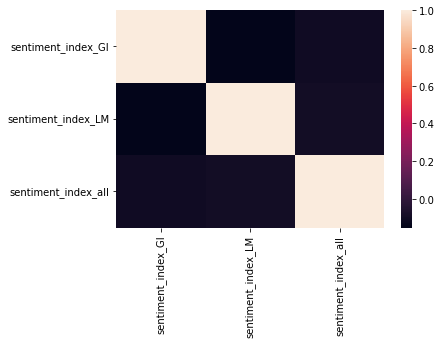

In [94]:
import seaborn as sns
sns.heatmap(final_df.corr(),annot=False,fmt='.lg')

In [95]:
# final_df.background_gradient(cmap='coolwarm').set_precision(2)

In [96]:
netIncome = fund.iloc[:,5:]
netIncome = netIncome.dropna()
netIncome

,Q1 2018,Q2 2018,Q3 2018,Q4 2018,Q1 2019
Company,,,,,
AHT,193.6,250.0,203.0,162.3,279.3
AZN,281.0,551.0,251.6,1137.0,839.0
BARC,824.4,1129.1,1135.1,148.0,1087.4
BP,2846.7,3475.6,3963.2,1770.8,3113.9
BTA,580.0,582.3,593.8,821.2,549.0
GSK,1090.0,1131.0,1552.0,1408.0,1339.0
HSBA,4098.5,4107.3,4083.7,1855.2,4262.8
IAG,568.0,648.4,1135.0,493.2,70.0
LLOY,1399.7,1352.6,1664.4,1201.0,1536.2


In [97]:
list_5 = list((netIncome['Q2 2018']/netIncome['Q1 2018']-1).values)
list_6 = list((netIncome['Q3 2018']/netIncome['Q1 2018']-1).values)
list_7 = list((netIncome['Q4 2018']/netIncome['Q1 2018']-1).values)
list_8 = list((netIncome['Q1 2019']/netIncome['Q1 2018']-1).values)
list_5 = pd.DataFrame(list_5)
list_6 = pd.DataFrame(list_6)
list_7 = pd.DataFrame(list_7)
list_8 = pd.DataFrame(list_8)
income = pd.concat([list_5,list_6,list_7,list_8],axis=1)
income.columns = ['Q2 2018','Q3 2018','Q4 2018','Q1 2019']
income

,Q2 2018,Q3 2018,Q4 2018,Q1 2019
0,0.291322,0.048554,-0.161674,0.442665
1,0.960854,-0.104626,3.046263,1.985765
2,0.369602,0.376880,-0.820475,0.319020
3,0.220922,0.392209,-0.377946,0.093863
4,0.003966,0.023793,0.415862,-0.053448
5,0.037615,0.423853,0.291743,0.228440
6,0.002147,-0.003611,-0.547347,0.040088
7,0.141549,0.998239,-0.131690,-0.876761
8,-0.033650,0.189112,-0.141959,0.097521
9,-0.114500,-0.002961,-0.303524,-0.107887


In [111]:
net = final_df.drop(final_df.index[[12,13]])
net

,sentiment_index_GI,sentiment_index_LM,sentiment_index_all
0,0.001665,-0.000328,0.070858
1,-0.002505,0.000708,0.031938
2,0.004616,-0.003555,0.030808
3,0.005440,0.000101,0.016215
4,0.008023,-0.001836,0.065438
5,0.004143,0.002532,0.049586
6,0.003881,-0.001146,0.036199
7,0.002792,-0.003216,0.072598
8,0.003365,-0.003203,0.037383
9,0.004079,-0.003424,0.037571


In [112]:
print(np.corrcoef(net["sentiment_index_all"],income['Q2 2018']))
print(np.corrcoef(net["sentiment_index_all"],income['Q3 2018']))
print(np.corrcoef(net["sentiment_index_all"],income['Q4 2018']))
print(np.corrcoef(net["sentiment_index_all"],income['Q1 2019']))

[[ 1.         -0.29813024]
 [-0.29813024  1.        ]]
[[1.         0.50864892]
 [0.50864892 1.        ]]
[[1.         0.41064067]
 [0.41064067 1.        ]]
[[ 1.         -0.38029065]
 [-0.38029065  1.        ]]


In [113]:
# df3 = net.join(income, how='outer')

In [114]:
# df3

In [105]:
Data=pd.concat([final_df,income],axis = 1)

In [106]:
Data = Data.dropna(axis=0,how='any') #delete NaN rows
Data

,sentiment_index_GI,sentiment_index_LM,sentiment_index_all,Q2 2018,Q3 2018,Q4 2018,Q1 2019
0,0.001665,-0.000328,0.070858,0.291322,0.048554,-0.161674,0.442665
1,-0.002505,0.000708,0.031938,0.960854,-0.104626,3.046263,1.985765
2,0.004616,-0.003555,0.030808,0.369602,0.376880,-0.820475,0.319020
3,0.005440,0.000101,0.016215,0.220922,0.392209,-0.377946,0.093863
4,0.008023,-0.001836,0.065438,0.003966,0.023793,0.415862,-0.053448
5,0.004143,0.002532,0.049586,0.037615,0.423853,0.291743,0.228440
6,0.003881,-0.001146,0.036199,0.002147,-0.003611,-0.547347,0.040088
7,0.002792,-0.003216,0.072598,0.141549,0.998239,-0.131690,-0.876761
8,0.003365,-0.003203,0.037383,-0.033650,0.189112,-0.141959,0.097521
9,0.004079,-0.003424,0.037571,-0.114500,-0.002961,-0.303524,-0.107887


<AxesSubplot:>

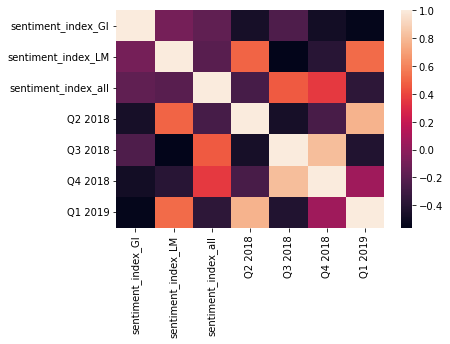

In [107]:
sns.heatmap(Data.corr(),annot=False,fmt='.lg')

## Linear Regression

## Revenue

In [50]:
# pip install statsmodels

In [39]:
from statsmodels.formula.api import ols
x_0 = final_df["sentiment_index_all"].reset_index()
x = x_0["sentiment_index_all"]
y = revenue['2018 Q2']
data = pd.DataFrame({'x':x, 'y':y})
model = ols('y~x', data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     5.569
Date:                Mon, 25 Apr 2022   Prob (F-statistic):             0.0346
Time:                        09:10:34   Log-Likelihood:                 19.635
No. Observations:                  15   AIC:                            -35.27
Df Residuals:                      13   BIC:                            -33.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0363      0.042     -0.863      0.4

In [40]:
y = revenue['2018 Q3']
data = pd.DataFrame({'x':x, 'y':y})
model = ols('y~x', data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.067
Method:                 Least Squares   F-statistic:                    0.1182
Date:                Mon, 25 Apr 2022   Prob (F-statistic):              0.736
Time:                        09:10:38   Log-Likelihood:                 10.731
No. Observations:                  15   AIC:                            -17.46
Df Residuals:                      13   BIC:                            -16.05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0702      0.076      0.923      0.3

In [41]:
y = revenue['2018 Q4']
data = pd.DataFrame({'x':x, 'y':y})
model = ols('y~x', data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     1.426
Date:                Mon, 25 Apr 2022   Prob (F-statistic):              0.254
Time:                        09:10:39   Log-Likelihood:               -0.56360
No. Observations:                  15   AIC:                             5.127
Df Residuals:                      13   BIC:                             6.543
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3069      0.161      1.900      0.0

In [42]:
y = revenue['2019 Q1']
data = pd.DataFrame({'x':x, 'y':y})
model = ols('y~x', data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     4.481
Date:                Mon, 25 Apr 2022   Prob (F-statistic):             0.0541
Time:                        09:10:40   Log-Likelihood:                 7.9316
No. Observations:                  15   AIC:                            -11.86
Df Residuals:                      13   BIC:                            -10.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1945      0.092     -2.122      0.0

## Net Income

In [43]:
y = income['Q2 2018']
data = pd.DataFrame({'x':x, 'y':y})
model = ols('y~x', data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.8916
Date:                Mon, 25 Apr 2022   Prob (F-statistic):              0.365
Time:                        09:10:44   Log-Likelihood:                -2.5159
No. Observations:                  13   AIC:                             9.032
Df Residuals:                      11   BIC:                             10.16
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3866      0.215      1.799      0.1

In [44]:
y = income['Q3 2018']
data = pd.DataFrame({'x':x, 'y':y})
model = ols('y~x', data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     2.985
Date:                Mon, 25 Apr 2022   Prob (F-statistic):              0.112
Time:                        09:10:45   Log-Likelihood:                -12.027
No. Observations:                  13   AIC:                             28.05
Df Residuals:                      11   BIC:                             29.18
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6940      0.447     -1.554      0.1

In [45]:
y = income['Q4 2018']
data = pd.DataFrame({'x':x, 'y':y})
model = ols('y~x', data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     1.619
Date:                Mon, 25 Apr 2022   Prob (F-statistic):              0.229
Time:                        09:10:45   Log-Likelihood:                -31.671
No. Observations:                  13   AIC:                             67.34
Df Residuals:                      11   BIC:                             68.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.0397      2.024     -1.502      0.1

In [46]:
y = income['Q1 2019']
data = pd.DataFrame({'x':x, 'y':y})
model = ols('y~x', data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     1.830
Date:                Mon, 25 Apr 2022   Prob (F-statistic):              0.203
Time:                        09:10:46   Log-Likelihood:                -11.084
No. Observations:                  13   AIC:                             26.17
Df Residuals:                      11   BIC:                             27.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7734      0.415      1.862      0.0

## correlation analysis 

In [47]:
netincome = pd.read_csv('NetIncome.csv')
netincome.index = netincome['Name']
del netincome['Name']
netincome = netincome.astype('float')
netincome

,2018Q1,2018Q2,2018Q3,2018Q4,2019Q1
Name,,,,,
AHT,193.60,250.00,203.00,162.30,279.30
AZN,281.00,551.00,251.60,1137.00,839.00
BARC,1147.20,1536.20,1478.80,190.40,1415.70
BP,2846.70,3475.60,3963.20,1770.80,3113.90
GSK,1516.70,1538.70,2022.00,1811.00,1743.30
HSBA,4098.50,4107.30,4083.70,1855.20,4262.80
IMB,337.50,367.00,245.50,438.50,339.50
LLOY,1947.70,1840.10,2168.50,1544.70,2000.00
NWG,1409.80,1220.50,1316.10,907.50,1176.70


In [48]:
netincome2 = pd.DataFrame()

for i in range(netincome.shape[1]-1):
    netincome2[netincome.columns[i+1]] = (netincome.iloc[:,i+1] - netincome.iloc[:,i])/netincome.iloc[:,i]

netincome2

,2018Q2,2018Q3,2018Q4,2019Q1
Name,,,,
AHT,0.291322,-0.188000,-0.200493,0.720887
AZN,0.960854,-0.543376,3.519078,-0.262093
BARC,0.339086,-0.037365,-0.871247,6.435399
BP,0.220922,0.140292,-0.553189,0.758471
GSK,0.014505,0.314096,-0.104352,-0.037383
HSBA,0.002147,-0.005746,-0.545706,1.297758
IMB,0.087407,-0.331063,0.786151,-0.225770
LLOY,-0.055245,0.178469,-0.287664,0.294750
NWG,-0.134274,0.078329,-0.310463,0.296639


In [49]:
data = final_df.merge(netincome2, on = 'Name')
print(np.cov(data['sentiment_index_all'], data['2018Q2']))
print(np.cov(data['sentiment_index_all'], data['2018Q3']))
print(np.cov(data['sentiment_index_all'], data['2018Q4']))
print(np.cov(data['sentiment_index_all'], data['2019Q1']))

[[ 0.00028597 -0.00169495]
 [-0.00169495  0.136617  ]]
[[2.85969800e-04 3.76425014e-03]
 [3.76425014e-03 3.27256199e-01]]
[[ 2.85969800e-04 -1.79683604e-02]
 [-1.79683604e-02  6.46181432e+00]]
[[2.85969800e-04 1.41334930e-03]
 [1.41334930e-03 4.24992864e+00]]


## FinBERT

In [35]:
#  pip install pdfplumber
# https://wandb.ai/ivangoncharov/FinBERT_Sentiment_Analysis_Project/reports/Financial-Sentiment-Analysis-on-Stock-Market-Headlines-With-FinBERT-Hugging-Face--VmlldzoxMDQ4NjM0

In [109]:
# # get file path in a folder
# data_folder_path = 'Data'  
# file_path_list = [ join(data_folder_path,_) for _ in listdir(data_folder_path)]

# # extract full text from pdfs
# def extract_full_text_pdf(pdf_path):
#     with pdfplumber.open( pdf_path ) as pdf:
#         page_list = pdf.pages
#         text_list = [ _.extract_text() for _ in page_list ]
#         full_text = ' '.join(text_list)
#     return(full_text)


# # extract_full_text_pdf( file_path )



# text_data_list = [ extract_full_text_pdf(_) for _ in file_path_list]

In [39]:
# text_data_list[1]

In [40]:
# text_data_list[17]

In [41]:
# text_data_list[0]

## FinBERT using HuggingFace

In [15]:
# !pip install transformers

In [32]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
  
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")

In [33]:
inputs = tokenizer(text_data_list, padding = True, truncation = True, return_tensors='pt')
print(inputs)

{'input_ids': tensor([[ 101, 2194, 2171,  ..., 1996, 1017,  102],
        [ 101, 2194, 2171,  ..., 2343, 1997,  102],
        [ 101, 2194, 2171,  ..., 2009, 1005,  102],
        ...,
        [ 101, 2194, 2171,  ..., 3445, 5703,  102],
        [ 101, 2194, 2171,  ..., 5618, 2057,  102],
        [ 101, 2194, 2171,  ..., 1010, 3488,  102]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]])}


## Running Inference with FinBERT and Stock Market News Headlines

In [34]:
outputs = model(**inputs)
print(outputs.logits.shape)

torch.Size([18, 3])


In [35]:
import torch

predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
print(predictions)

tensor([[0.0688, 0.0144, 0.9168],
        [0.0302, 0.0229, 0.9470],
        [0.1781, 0.0114, 0.8104],
        [0.8040, 0.0109, 0.1851],
        [0.5652, 0.0193, 0.4155],
        [0.0432, 0.0199, 0.9369],
        [0.9482, 0.0158, 0.0359],
        [0.0673, 0.0144, 0.9183],
        [0.0320, 0.0198, 0.9482],
        [0.0412, 0.0231, 0.9357],
        [0.7072, 0.0109, 0.2818],
        [0.0417, 0.0318, 0.9265],
        [0.0320, 0.0300, 0.9380],
        [0.8384, 0.0095, 0.1520],
        [0.0303, 0.0260, 0.9436],
        [0.8866, 0.0104, 0.1030],
        [0.1659, 0.0158, 0.8184],
        [0.0284, 0.0289, 0.9427]], grad_fn=<SoftmaxBackward0>)


## Visualizing the Results Interactively as a Wandb Table

In [36]:
import pandas as pd

positive = predictions[:, 0].tolist()
negative = predictions[:, 1].tolist()
neutral = predictions[:, 2].tolist()

table = {'Headline':text_data_list,
         "Positive":positive,
         "Negative":negative, 
         "Neutral":neutral}
      
df = pd.DataFrame(table, columns = ["Headline", "Positive", "Negative", "Neutral"])

df.head(5)

,Headline,Positive,Negative,Neutral
0,Company Name: Endeavour Mining Market Cap: 234...,0.068790,0.014430,0.916780
1,Company Name: Glaxo Market Cap: 70030.4659254 ...,0.030176,0.022853,0.946972
2,Company Name: Randgold Resources Market Cap: 5...,0.178138,0.011425,0.810438
3,Company Name: Ashtead Market Cap: 8781.3802740...,0.804041,0.010888,0.185071
4,Company Name: Imperial Brands Market Cap: 2651...,0.565179,0.019312,0.415509


In [37]:
# !pip install wandb

In [39]:
# import wandb

In [110]:
# wandb.init(project="FinBERT_Sentiment_Analysis_Project")